In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [4]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Administrator\Desktop\5高级商业分析\期中\w3\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   object  
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

Attrition                 No  Yes   All
OverTime MaritalStatus                 
No       Divorced        214   14   228
         Married         446   41   487
         Single          284   55   339
Yes      Divorced         80   19    99
         Married         143   43   186
         Single           66   65   131
All                     1233  237  1470


<Figure size 1000x600 with 0 Axes>

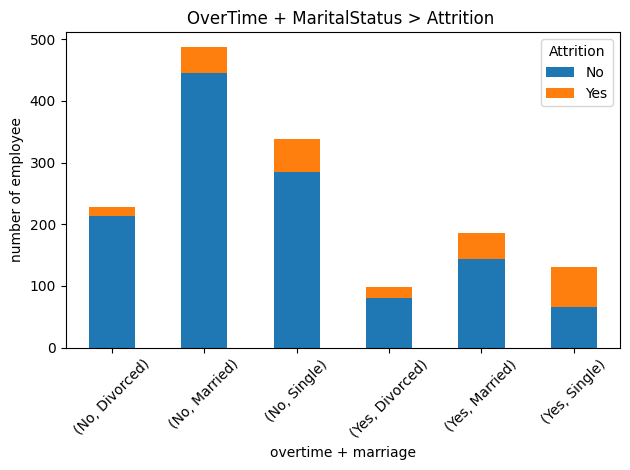

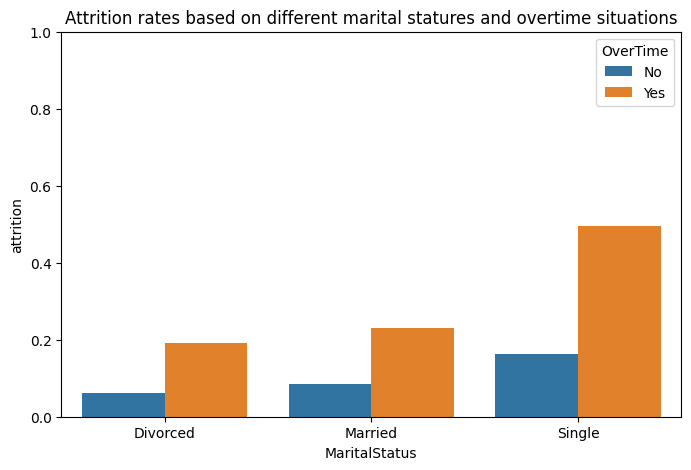

In [17]:
crosstab = pd.crosstab([df['OverTime'], df['MaritalStatus']], df['Attrition'], margins=True)
print(crosstab)
plt.figure(figsize=(10,6))
pd.crosstab([df['OverTime'], df['MaritalStatus']], df['Attrition']).plot(kind='bar', stacked=True)
plt.title('OverTime + MaritalStatus > Attrition ')
plt.ylabel('number of employee')
plt.xlabel('overtime + marriage')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()
df['Attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})

attrition_rate = df.groupby(['OverTime','MaritalStatus'])['Attrition_flag'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='MaritalStatus', y='Attrition_flag', hue='OverTime', data=attrition_rate)
plt.ylabel('attrition')
plt.title('Attrition rates based on different marital statures and overtime situations')
plt.ylim(0,1)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27016\1426764562.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["JobRole", "Attrition"])["MonthlyIncome"].mean().reset_index()


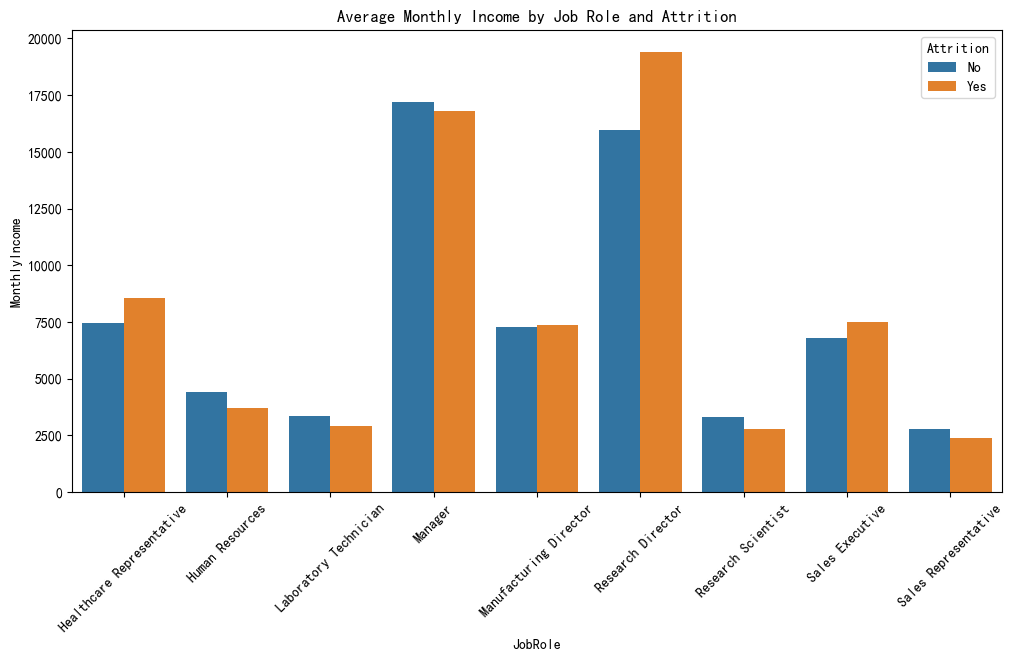

In [32]:
grouped = df.groupby(["JobRole", "Attrition"])["MonthlyIncome"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x="JobRole", y="MonthlyIncome", hue="Attrition")
plt.xticks(rotation=45)
plt.title("Average Monthly Income by Job Role and Attrition")
plt.show()



C:\Users\Administrator\AppData\Local\Temp\ipykernel_27016\2142244621.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rate = df.groupby(["JobRole", "Attrition"])["MonthlyIncome"].count().reset_index()


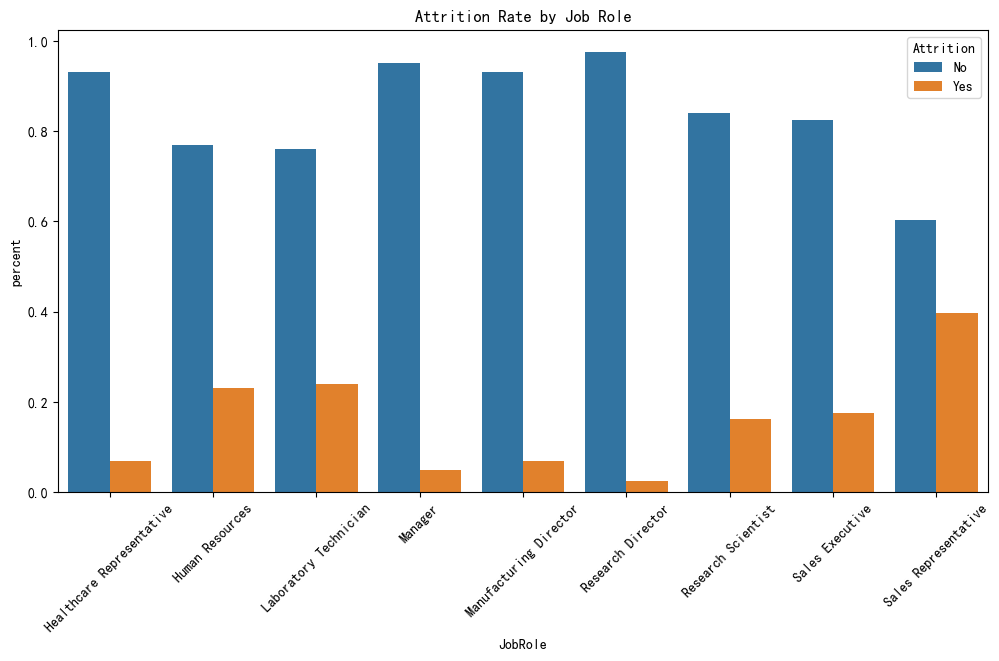

In [35]:
grouped_rate = df.groupby(["JobRole", "Attrition"])["MonthlyIncome"].count().reset_index()
grouped_rate["percent"] = grouped_rate.groupby("JobRole")["MonthlyIncome"].transform(lambda x: x / x.sum())

plt.figure(figsize=(12,6))
sns.barplot(data=grouped_rate, x="JobRole", y="percent", hue="Attrition")
plt.xticks(rotation=45)
plt.title("Attrition Rate by Job Role")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27016\319967927.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['BusinessTravel', 'Gender', 'Attrition']).size().reset_index(name='Count')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_27016\319967927.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped, x='BusinessTravel', y='Count', hue='Attrition', ci=None, palette='Set2', hue_order=['No','Yes'], dodge=True)


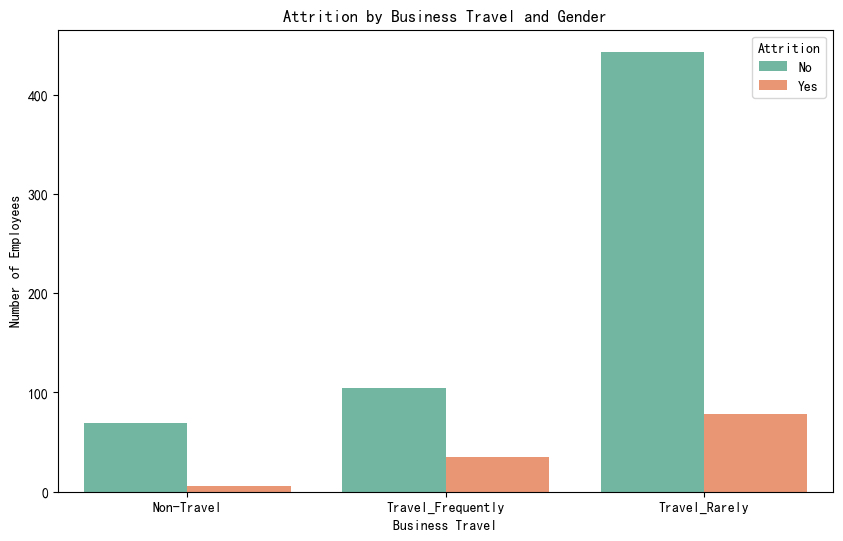

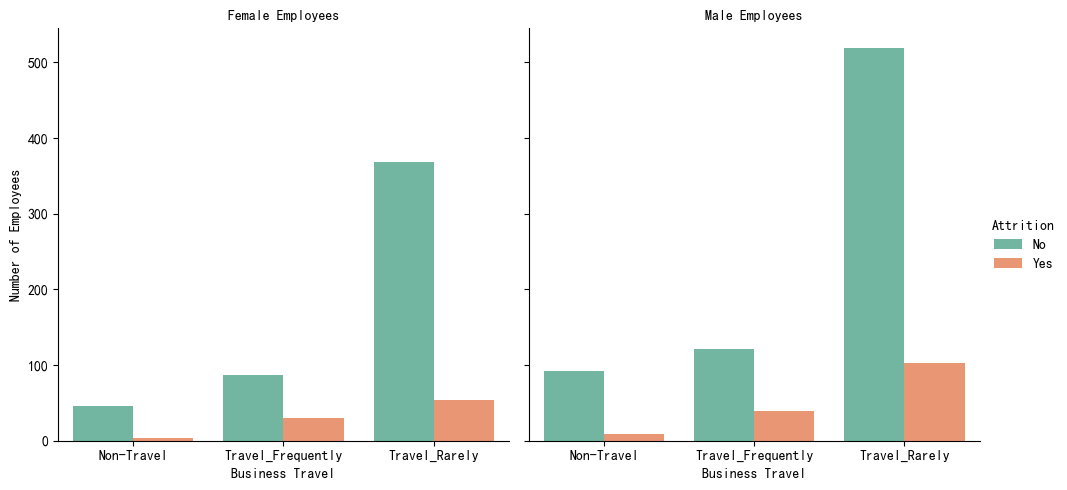

In [36]:
grouped = df.groupby(['BusinessTravel', 'Gender', 'Attrition']).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='BusinessTravel', y='Count', hue='Attrition', ci=None, palette='Set2', hue_order=['No','Yes'], dodge=True)

plt.title('Attrition by Business Travel and Gender')
plt.xlabel('Business Travel')
plt.ylabel('Number of Employees')

g = sns.catplot(
    data=grouped,
    x='BusinessTravel',
    y='Count',
    hue='Attrition',
    col='Gender',
    kind='bar',
    height=5,
    aspect=1,
    palette='Set2'
)
g.set_axis_labels("Business Travel", "Number of Employees")
g.set_titles("{col_name} Employees")
g._legend.set_title('Attrition')

plt.show()
